In [1]:
from skimage.io import imread
import numpy as np
from scipy.io import loadmat
from matplotlib import pyplot as plt
import time


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/MathematicalModelMethodImageProcessing')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/MathematicalModelMethodImageProcessing'

In [4]:
rootfolder = '/content/drive/MyDrive/Colab Notebooks/MathematicalModelMethodImageProcessing/Assignments'

Useful function for computing the PSNR

In [8]:
def compute_psnr(Y_true, Y_pred):
  mse = np.square(np.subtract(Y_true,Y_pred)).mean()
  #max_signal = np.max(Y_true)
  max_signal = 1
  return 10* np.log10(max_signal**2 / mse)

Load the image and rescale it in $[0,1]$

In [16]:
img = imread(f'{rootfolder}/data/cameraman.png') / 255
#img = img[50:200, 50:200]
imsz = img.shape

# patch size
p = 7

# number of elements in the patch
M = p ** 2

# radius of the search neighborhood
H = 12

Corrupt the image with white gaussian noise

In [17]:
sigma_noise = 20/255
noisy_img = img + np.random.normal(size=imsz) * sigma_noise

Compute the PSNR of the noisy input

In [18]:
psnr_noisy = compute_psnr(img, noisy_img)

Text(0.5, 1.0, 'Noisy image, PSNR = 22.12')

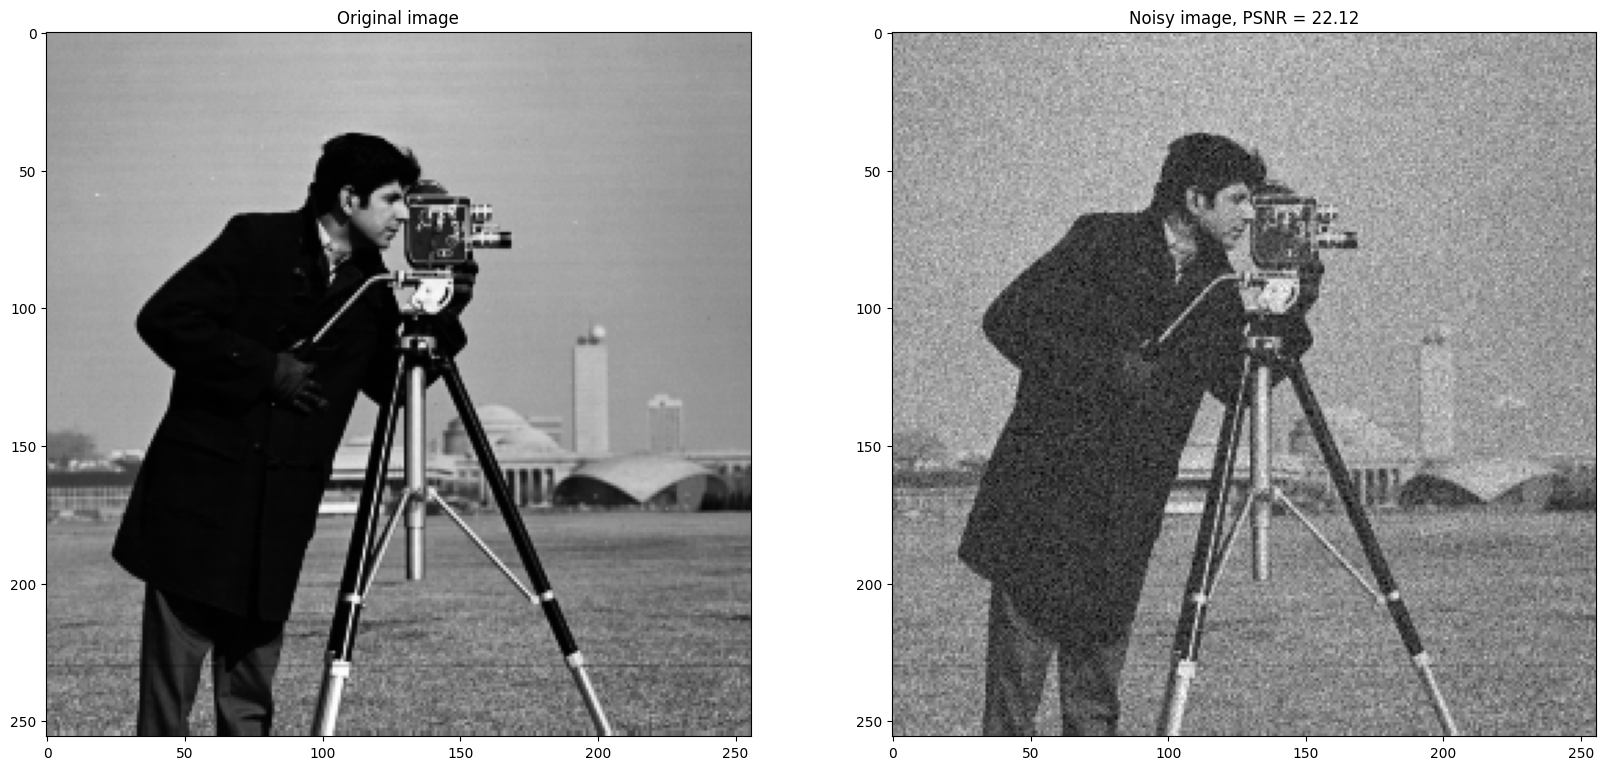

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original image')

ax[1].imshow(noisy_img, cmap='gray')
ax[1].set_title(f'Noisy image, PSNR = {psnr_noisy:.2f}')


Pixel-based NL-Means
--------------------
Set parameters and initialize the variables

In [20]:
# initialize the estimated image
img_hat = np.zeros_like(img)

# pad the noisy image
img_pad = np.pad(noisy_img, p//2, mode='symmetric')


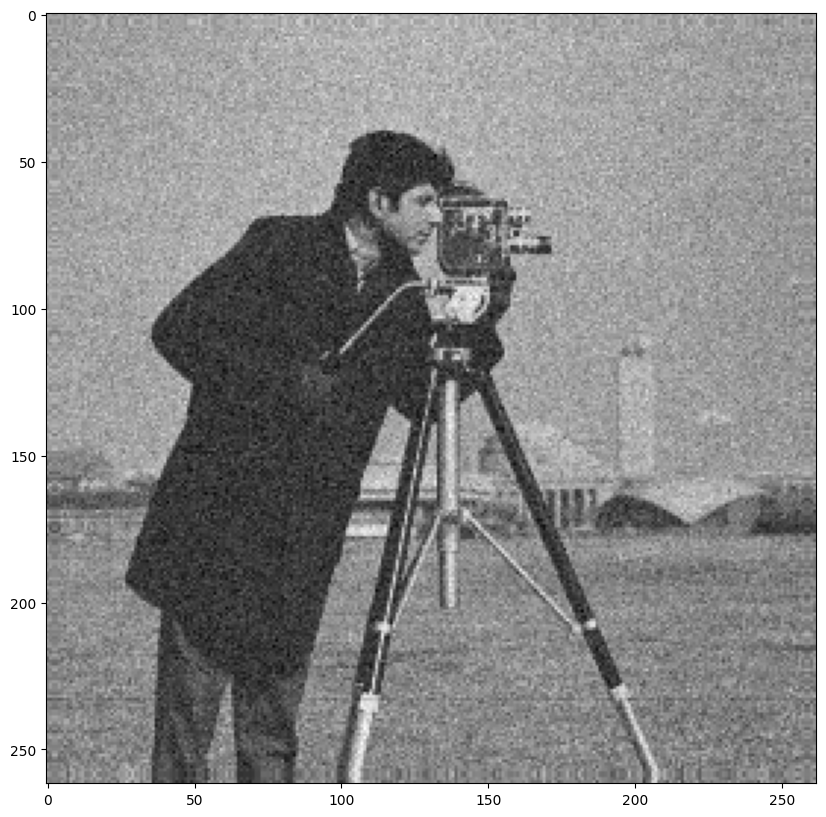

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(img_pad, cmap='gray')

Main loop

In [22]:
for i in range(0, imsz[0]):
    for j in range(0, imsz[1]):
        # extrach the patch from img_pad whose center has the location (i, j) in the noisy image
        s = img_pad[i:i+p, j:j+p]

        # initialize the pixel estimate and the total weights
        pixel_hat = 0
        weight = 0

        # extract all the patches in the search neighborhood
        for r in range(-H, H+1):
            for c in range(-H, H+1):
              if (i+r >= 0 and i+r < imsz[0] and j+c >= 0 and j+c < imsz[1]):
                # extract the patch
                z = img_pad[i+r:i+r+p, j+c:j+c+p]

                # compute the distance with the reference patch
                d = np.linalg.norm(s - z)**2
                w = np.exp(-d/(M * sigma_noise**2))

                # update the weight and the pixel estimate
                z_center = z[p//2, p//2]
                pixel_hat = pixel_hat + w * z_center
                weight = weight + w
                # weight

        # estimate the pixel (i, j) as the weighted average of the central pixel of the extracted patches
        img_hat[i, j] = pixel_hat / weight


Compute the PSNR of the estimated image

Text(0.5, 1.0, 'Estimated Image,\nPSNR = 28.56')

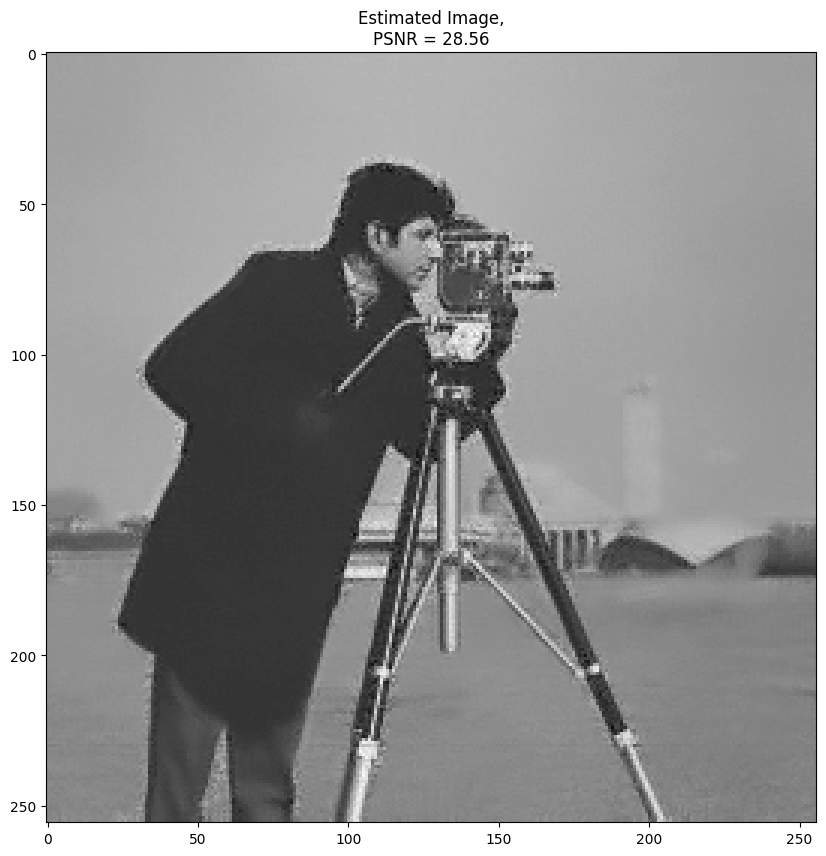

In [23]:
psnr_hat = compute_psnr(img, img_hat)
plt.figure(figsize=(10,10))
plt.imshow(img_hat, cmap='gray')
plt.title(f'Estimated Image,\nPSNR = {psnr_hat:.2f}')
